<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/demos/algorithms/DecisionTree_Iris.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Demo: Classify Flowers With Decision Trees

In [1]:
# When running Jupyter locally, the python-graphviz package must be installed on your system
# Comment the first line below and launch the following command:
# conda install python-graphviz
#!apt update && apt install -y graphviz
!pip install graphviz

In [2]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Setup plots
%matplotlib inline
#plt.rcParams['figure.figsize'] = 10, 8

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [5]:
dataset = load_iris()

# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = dataset.target
df_iris['class'] = dataset.target_names[dataset.target]
# Show 10 random samples
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
149,5.9,3.0,5.1,1.8,2,virginica
14,5.8,4.0,1.2,0.2,0,setosa
67,5.8,2.7,4.1,1.0,1,versicolor
27,5.2,3.5,1.5,0.2,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
74,6.4,2.9,4.3,1.3,1,versicolor
29,4.7,3.2,1.6,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica


In [6]:
# Use only last two features: petal length and width

#x_train, x_test, y_train, y_test = train_test_split(dataset.data[:, 2:], dataset.target)
x_train = dataset.data[:, 2:]
y_train = dataset.target

In [7]:
model = DecisionTreeClassifier(max_depth = 2, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [8]:
# Compute accuracy on training and test sets
train_acc = model.score(x_train, y_train)
#test_acc = model.score(x_test, y_test)

print(f'Training accuracy: {train_acc * 100:.2f}%')
#print(f'Test accuracy: {test_acc * 100:.2f}%')

Training accuracy: 96.00%


In [9]:
from sklearn.tree import export_graphviz

export_graphviz(
    model,
    out_file="iris_tree.dot",
    feature_names=dataset.feature_names[2:],
    class_names=dataset.target_names,
    rounded=True,
    filled=True
)

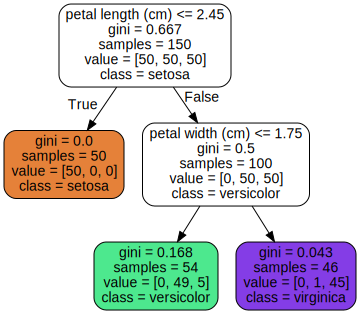

In [10]:
import graphviz

with open("iris_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Text(4.05, 0.5, '(Depth=2)')

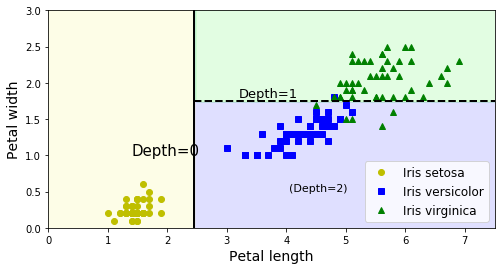

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=12)

plt.figure(figsize=(8, 4))
plot_decision_boundary(model, x_train, y_train)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
#plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
#plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

In [12]:
flower_data = [[5, 1.5]]
print(model.predict_proba(flower_data))
print(dataset.target_names[model.predict(flower_data)])

[[0.         0.90740741 0.09259259]]
['versicolor']


In [13]:
# Use all features and split the dataset to assert overfitting

x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target)

In [14]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [15]:
# Compute accuracy on training and test sets
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print(f'Training accuracy: {train_acc * 100:.2f}%')
print(f'Test accuracy: {test_acc * 100:.2f}%')

Training accuracy: 100.00%
Test accuracy: 94.74%


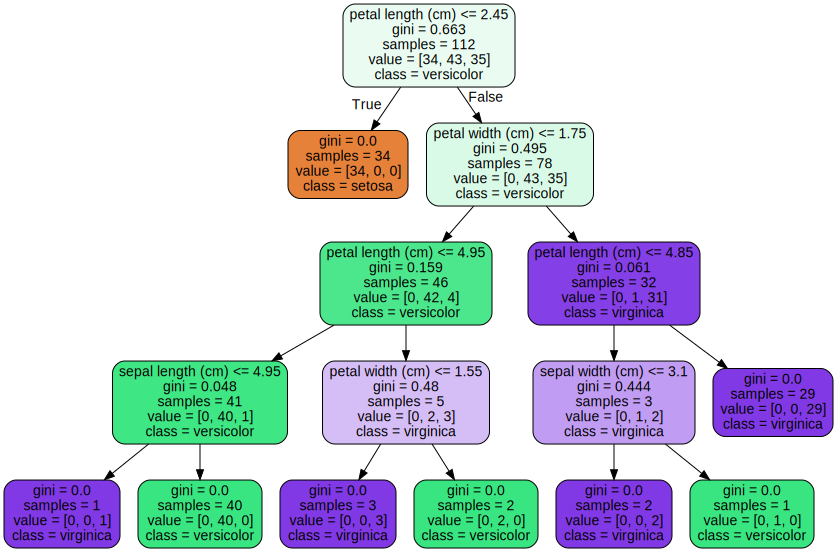

In [16]:
export_graphviz(
    model,
    out_file="iris_tree.dot",
    feature_names=dataset.feature_names,
    class_names=dataset.target_names,
    rounded=True,
    filled=True
)

with open("iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)